# Compare IFS with Science camera

In [2]:
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'

from astropy.io import fits

IFScube = fits.getdata('/Users/mrizzo/IFS/PISCES/data_IFS_170626/run501it04662.fits')
SPCslicename = np.array([0,5,9,13,17,21,25])
SPCslicenum = np.array([6*i+SPCslicename[i] for i in range(len(SPCslicename))])
print(SPCslicenum)
IFSslices = IFScube[SPCslicenum]
IFSslices[IFSslices<0] =0.0
print(IFSslices.shape)
SPCslices = np.zeros((len(SPCslicename),500,500))
for i in range(len(SPCslicename)):
    j = SPCslicename[i]
    SPCslices[i] =fits.getdata('/Users/mrizzo/IFS/PISCES/data_IFS_170626/run501it04662_band_'+str(j)+'_SPC.fits')

Populating the interactive namespace from numpy and matplotlib
[ 0 11 21 31 41 51 61]
(7, 200, 200)


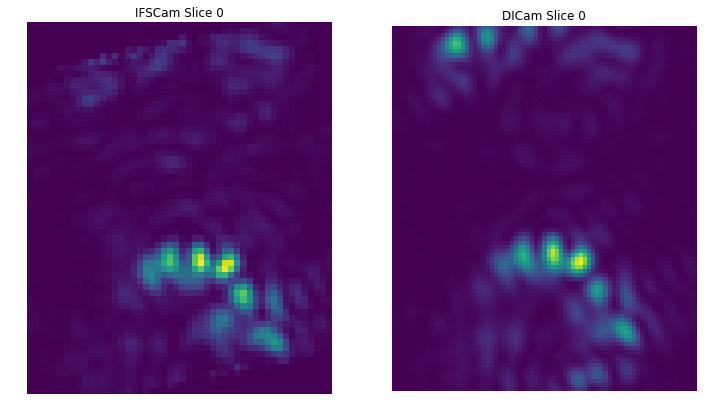

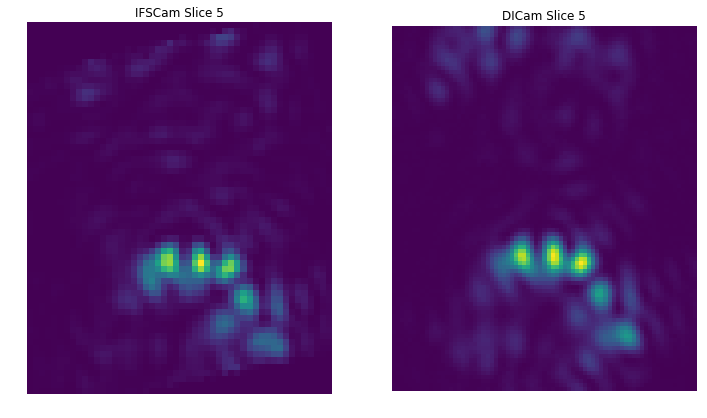

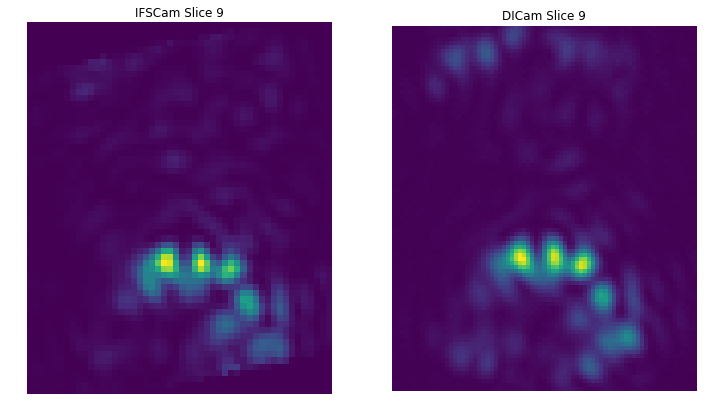

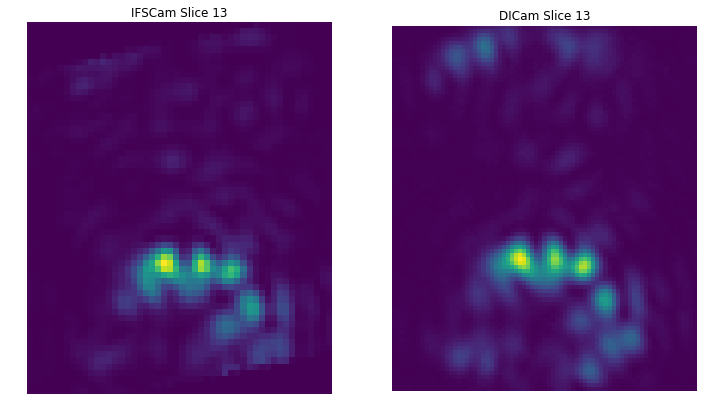

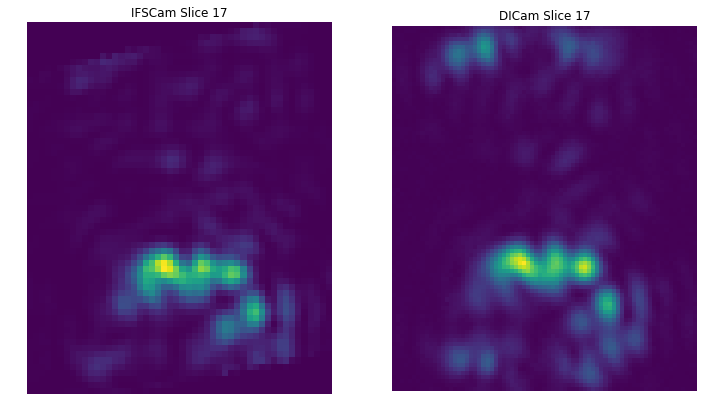

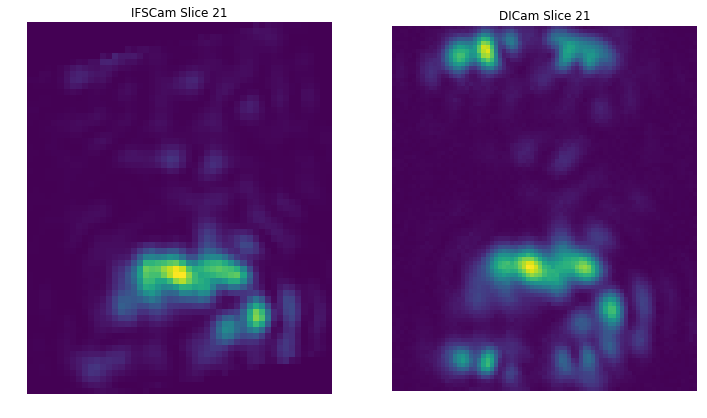

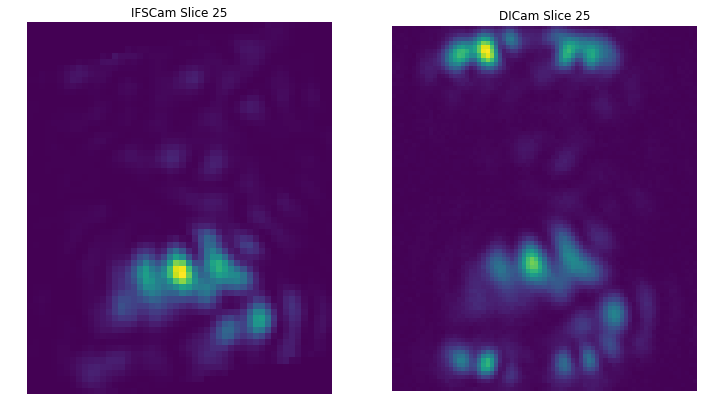

In [41]:
for i in range(len(SPCslicename)):
    plt.figure(figsize=(12,12))
    plt.subplot(121)
    plt.imshow(IFSslices[i,70:131,75:125])
    plt.axis('off')
    plt.title('IFSCam Slice %d' % SPCslicename[i])
    #plt.colorbar(fraction=0.046, pad=0.04,orientation='horizontal')
    plt.subplot(122)
    plt.imshow(SPCslices[i,265:355,215:290])
    plt.axis('off')
    plt.title('DICam Slice %d' % SPCslicename[i])
    #plt.colorbar(fraction=0.046, pad=0.04,orientation='horizontal')


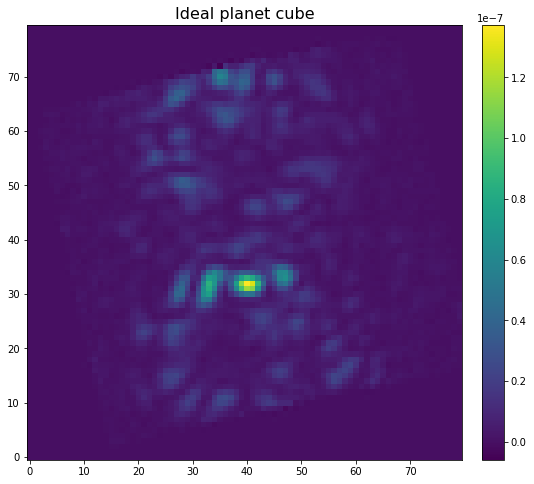

In [21]:
IFScube = fits.getdata('/Users/mrizzo/Downloads/run501it03776.fits')
SPCslicename = np.array([0,5,9,13,17,21,25])
SPCslicenum = np.array([6*i+SPCslicename[i]+1+j for i in range(len(SPCslicename)) for j in range(6) ])
print(SPCslicenum)
IFSout =IFScube[[i for i in range(IFScube.shape[0]) if i not in SPCslicenum]]
print IFSout.shape
trim = 60

import ipywidgets
def plt_cubes_slices(wchan):
    plt.figure(figsize=(20,8))
    plt.subplot(121)
    plt.imshow(IFSout[wchan-1,trim:-trim,trim:-trim], cmap='viridis')
    plt.title("Ideal planet cube",fontsize=16)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.grid(False)
ipywidgets.interact(plt_cubes_slices, wchan=(1,IFSout.shape[0]));

out = fits.HDUList(fits.PrimaryHDU(IFSout[:,trim:-trim,trim:-trim]))
out.writeto('/Users/mrizzo/Downloads/darkhole.fits',clobber=True)